In [1]:
# Tabular (xgboost) baseline model


In [3]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


Total rows: 500
Feature shape: (500, 14)

XGBOOST RESULTS
RMSE: 63380.2764963964
R2 Score: 0.9710280895233154

Top 10 Important Features:
                  Feature  Importance
7                   grade    0.501558
2             sqft_living    0.169341
13  price_per_square_feet    0.136818
10                    lat    0.045562
8              sqft_above    0.030891
5                    view    0.020022
9           sqft_basement    0.018948
3                  floors    0.017999
1               bathrooms    0.017953
11                   long    0.016015


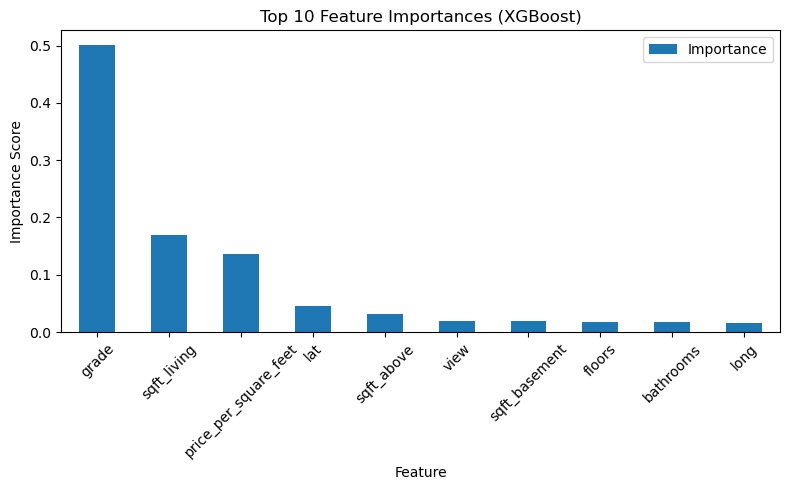

In [7]:
# ================================
# XGBOOST TABULAR MODEL (BASELINE) with 500 rows complete cleaned dataset(having images)
# ================================

# STEP 0: Imports
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


# STEP 1: Load dataset
df = pd.read_csv(r"C:\Users\vansh\Desktop\satellite imagery\project_root\final_multimodal.csv")

print("Total rows:", len(df))



TARGET = "price"

y = df[TARGET]

# Drop target and image path (XGBoost is tabular-only)
X = df.drop(columns=[TARGET,"image_path"])

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

print("Feature shape:", X.shape)


# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# STEP 4: Scale features (recommended for stability)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# STEP 5: Define XGBoost model (normal, safe configuration)
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)


# STEP 6: Train model
xgb_model.fit(X_train_scaled, y_train)


# STEP 7: Predict
y_pred = xgb_model.predict(X_test_scaled)


# STEP 8: Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nXGBOOST RESULTS")
print("RMSE:", rmse)
print("R2 Score:", r2)


# STEP 9: Feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))


# STEP 10: Plot feature importance (optional but recommended)
importance_df.head(10).plot(
    x="Feature",
    y="Importance",
    kind="bar",
    figsize=(8, 5),
    title="Top 10 Feature Importances (XGBoost)"
)

plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
